<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2022</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Tuesday, April 28 • 17:00 - 19:00 UTC (starts at 10.00 a.m. CET)</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://app.slack.com/client/T094HBB9T/C039C3J7Y1M">#t22-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live stream</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.youtube.com/playlist?list=PLgLft9vxdduDFkG9gtuNicNmb2YUzWqSQ">https://www.youtube.com/playlist?list=PLgLft9vxdduDFkG9gtuNicNmb2YUzWqSQ</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

## Incorporating prior data into ERT inversion

This field data is from a site with layered sands and clays over a resistive bedrock.

As a position of x=155m (center of the profile) we have a borehole/direct push with known in-situ-data.

In [25]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook
import numpy as np
import pygimli as pg
from pygimli.physics import ert

In [26]:
data = ert.load("data/bedrock.dat")
print(data)

Data: Sensors: 64 data: 1223, nonzero entries: ['a', 'b', 'err', 'm', 'n', 'rhoa', 'valid']


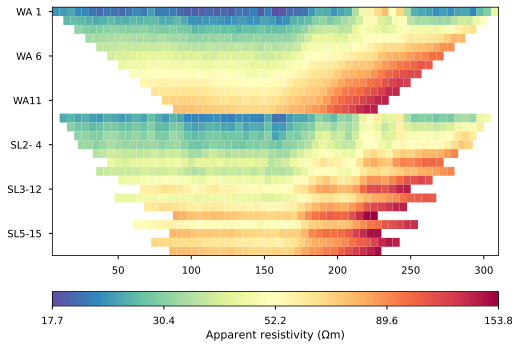

In [27]:
ert.show(data);

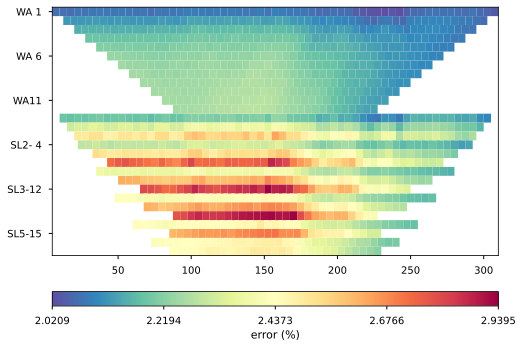

In [28]:
data["k"] = ert.geometricFactors(data)
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteUError=50e-6)
ert.show(data, data["err"]*100, label="error (%)");

In [29]:
mgr = ert.ERTManager(data)
mgr.invert(paraDepth=80, quality=34.6, paraMaxCellSize=100)

25/04/22 - 14:17:37 - pyGIMLi - INFO - Found 2 regions.
25/04/22 - 14:17:37 - pyGIMLi - INFO - Region with smallest marker (1) set to background
25/04/22 - 14:17:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
25/04/22 - 14:17:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
25/04/22 - 14:17:37 - pyGIMLi - INFO - Use median(data values)=48.34
25/04/22 - 14:17:37 - pyGIMLi - INFO - Created startmodel from forward operator: 1674 [48.34,...,48.34]


1674 [17.343535610405148,...,173.32445123818633]

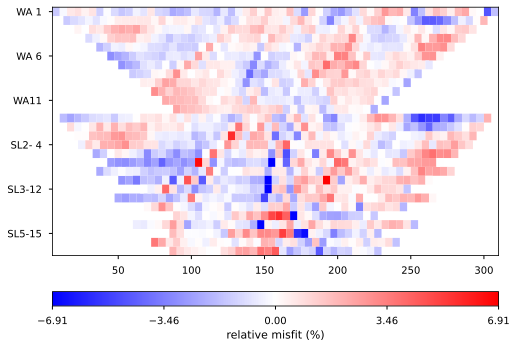

In [30]:
# mgr.showFit()
mgr.showMisfit()

In [31]:
x, z, r = np.genfromtxt("data/borehole.xzr", unpack=True)

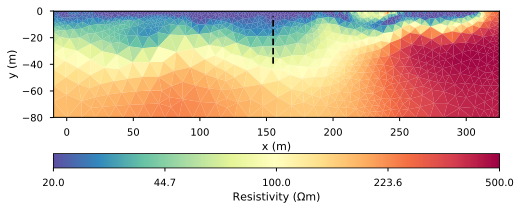

In [32]:
kw = dict(cMin=20, cMax=500, logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)")
ax, cb = mgr.showResult(**kw)
ax.plot(x, z, color="black", linestyle="dashed");

In [33]:
posVec = [pg.Pos(pos) for pos in zip(x, z)]
resMesh = pg.interpolate(srcMesh=mgr.paraDomain, inVec=mgr.model, destPos=posVec)
# shouldn't it work also like numpy y=interp(x, xf, yf)
# resMesh = pg.interpolate(posVec, mgr.paraDomain, mgr.model)

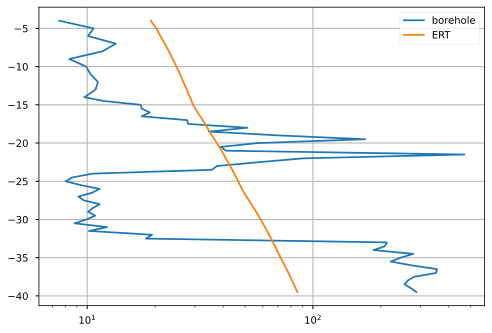

In [34]:
fig, ax = plt.subplots()
ax.semilogx(r, z, label="borehole")
ax.semilogx(resMesh, z, label="ERT")
ax.grid(True)
ax.legend();

25/04/22 - 14:18:27 - pyGIMLi - INFO - Use median(data values)=48.34
25/04/22 - 14:18:27 - pyGIMLi - INFO - Created startmodel from forward operator: 1674 [48.34,...,48.34]


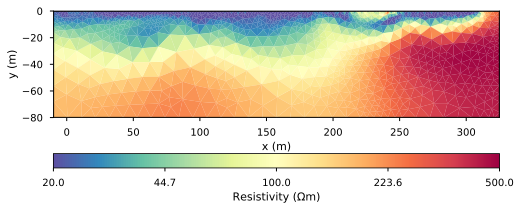

In [35]:
# mgr.invert(paraDepth=80, paraDX=0.25, quality=34.6, zWeight=0.2)
mgr.inv.setRegularization(zWeight=0.1)
mgr.invert()
mgr.showResult(**kw);

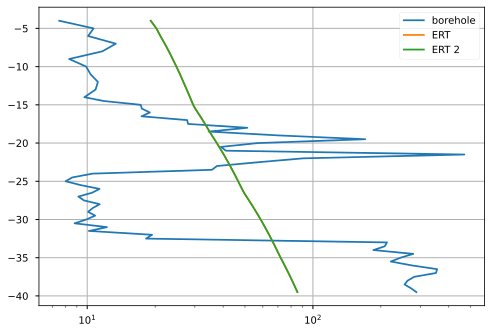

In [36]:
resMesh = pg.interpolate(srcMesh=mgr.paraDomain, inVec=mgr.model, destPos=posVec)
ax.semilogx(resMesh, z, label="ERT 2")
ax.legend()
ax.figure

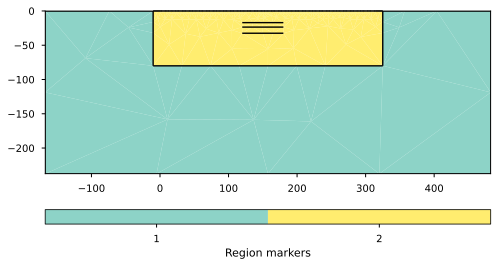

In [42]:
xx = [120, 180]
import pygimli.meshtools as mt
plc = mt.createParaMeshPLC(data, paraDepth=80, paraDX=0.25, boundary=0.5)
for zz in [17, 23.5, 32.5]:
    plc += mt.createLine([xx[0], -zz], [xx[1], -zz])
ax, _ = pg.show(plc)
# ax.set_xlim(-20, 330)
# ax.set_ylim(-90, 0)

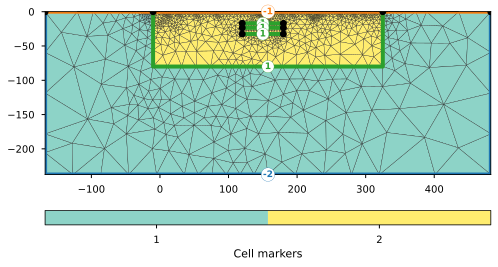

In [44]:
mesh = mt.createMesh(plc, quality=34.6)
ax, _ = pg.show(mesh, markers=True, showMesh=True)

25/04/22 - 14:24:56 - pyGIMLi - INFO - Found 2 regions.
25/04/22 - 14:24:56 - pyGIMLi - INFO - Region with smallest marker (1) set to background
25/04/22 - 14:24:56 - pyGIMLi - INFO - Creating forward mesh from region infos.
25/04/22 - 14:24:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
25/04/22 - 14:24:56 - pyGIMLi - INFO - Use median(data values)=48.34
25/04/22 - 14:24:56 - pyGIMLi - INFO - Created startmodel from forward operator: 2142 [48.34,...,48.34]


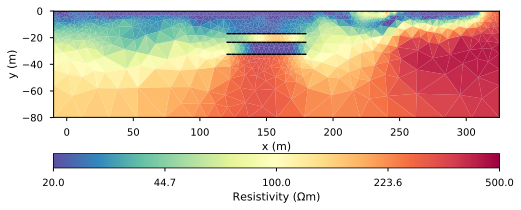

In [45]:
mgr.invert(mesh=mesh)
mgr.showResult(**kw);

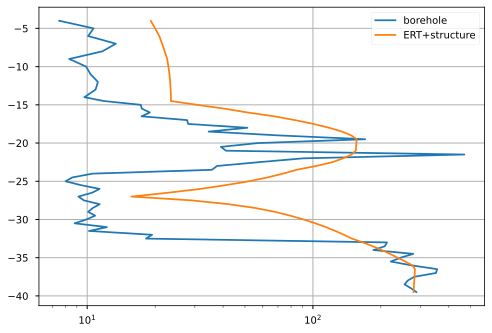

In [46]:
resMesh = pg.interpolate(srcMesh=mgr.paraDomain, inVec=mgr.model, destPos=posVec)
fig, ax = plt.subplots()
ax.semilogx(r, z, label="borehole")
ax.semilogx(resMesh, z, label="ERT+structure")
ax.grid(True)
ax.legend();
# ax.figure

In [47]:
from pygimli.frameworks import PriorModelling, JointModelling

mesh = mt.createParaMesh(data, paraDX=0.25, paraDepth=80, quality=34.6)
print(mesh)
para = mesh.createSubMesh(mesh.cells(mesh.cellMarkers() == 2))
print(para)
fopDP = PriorModelling(para, posVec)

25/04/22 - 14:25:57 - pyGIMLi - INFO - Found 1 regions.


Mesh: Nodes: 2005 Cells: 3761 Boundaries: 5765
Mesh: Nodes: 1602 Cells: 2956 Boundaries: 4557


25/04/22 - 14:26:08 - pyGIMLi - INFO - Use median(data values)=17.84227805
25/04/22 - 14:26:08 - pyGIMLi - INFO - Created startmodel from forward operator: 2956 [17.84227805,...,17.84227805]
25/04/22 - 14:26:08 - pyGIMLi - INFO - Creating forward mesh from region infos.


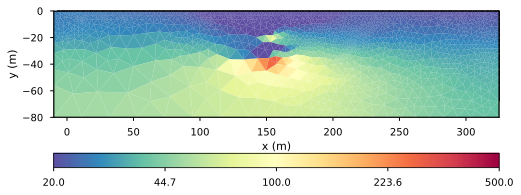

In [48]:
inv = pg.Inversion(fop=fopDP)
inv.mesh = para
tLog = pg.trans.TransLog()
inv.modelTrans = tLog
inv.dataTrans = tLog
inv.setRegularization(cType=1, zWeight=0.1)
model = inv.run(r, np.ones_like(r)*0.03)
pg.show(para, model, **kw);

25/04/22 - 14:27:17 - pyGIMLi - INFO - Use median(data values)=17.84227805
25/04/22 - 14:27:17 - pyGIMLi - INFO - Created startmodel from forward operator: 2956 [17.84227805,...,17.84227805]
25/04/22 - 14:27:17 - pyGIMLi - INFO - Createing GeostatisticConstraintsMatrix for region 2 with: I=[50, 5], dip=0, strike=0
25/04/22 - 14:27:23 - pyGIMLi - INFO - (C) Time for eigenvalue decomposition: 4.7s
25/04/22 - 14:27:24 - pyGIMLi - INFO - Cache stored: C:\Guenther.T\Anwendungsdaten\pygimli\Cache\12280959457091843277


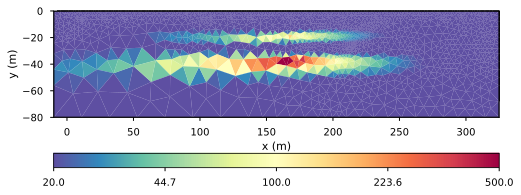

In [50]:
inv.setRegularization(correlationLengths=[50, 5])
model = inv.run(r, np.ones_like(r)*0.03)
pg.show(para, model, **kw);

## Joint inversion of ERT and DP data
We now use the framework `JointModelling` to combine the ERT and the DP forward operators.
So we set up a new ERT modelling operator and join it with `fopDP`.

In [51]:
fopERT = ert.ERTModelling()
fopERT.setMesh(mesh)
fopERT.setData(data) # not necessary as done by JointModelling
fopJoint = JointModelling([fopERT, fopDP])
fopJoint.setMesh(para)
fopJoint.setData([data, pg.Vector(r)])  # needs to have .size() attribute!

25/04/22 - 14:35:58 - pyGIMLi - INFO - Found 2 regions.
25/04/22 - 14:35:58 - pyGIMLi - INFO - Region with smallest marker (1) set to background
25/04/22 - 14:35:59 - pyGIMLi - INFO - Found 1 regions.
25/04/22 - 14:35:59 - pyGIMLi - INFO - Found 1 regions.


We first test the joint forward operator. We create a modelling vector of constant resistivity and distribute the model response into the two parts that can be looked at individually.

25/04/22 - 14:36:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
25/04/22 - 14:36:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


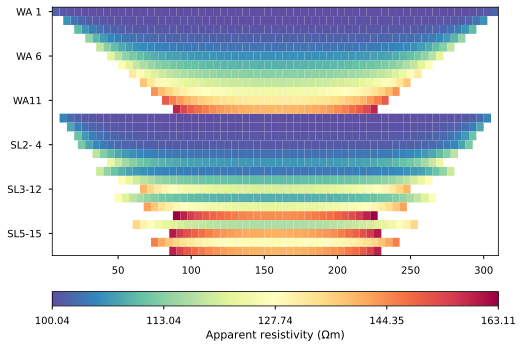

In [52]:
model = pg.Vector(para.cellCount(), 100)
response = fopJoint(model)
respERT = response[:data.size()]
respDP = response[data.size():]
print(respDP)
ert.show(data, respERT);

In [54]:
# test Jacobian
fopJoint.createJacobian(model)  # works
J = fopJoint.jacobian()
type(J) # wrong type

pygimli.core._pygimli_.RBlockMatrix

None


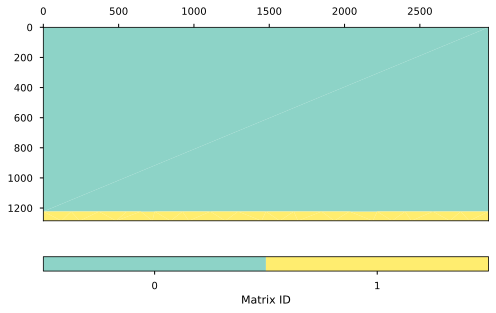

In [55]:
pg.show(J);

RMatrix: 1223 x 2956
None


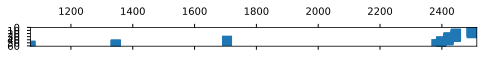

In [61]:
print(J.mat(0))
pg.show(J.mat(1));

In [62]:
dataVec = np.concatenate((data["rhoa"], r))
errorVec = np.concatenate((data["rhoa"], np.ones_like(r)*0.03))
inv = pg.Inversion(fop=fopJoint)
transLog = pg.trans.TransLog()
inv.modelTrans = transLog
inv.dataTrans = transLog
inv.run(dataVec, errorVec, startModel=model)

25/04/22 - 14:40:27 - pyGIMLi - INFO - Starting model set from given array. 2956 [100.0,...,100.0]
25/04/22 - 14:40:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
25/04/22 - 14:40:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


2956 [39.56280256466149,...,41.7523007392373]

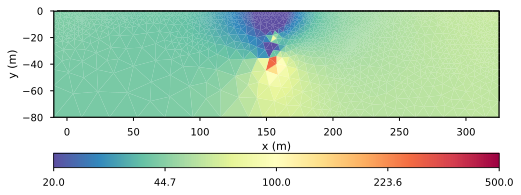

In [63]:
pg.show(para, inv.model, **kw);

In [64]:
inv.setRegularization(correlationLengths=[50, 5])
model = inv.run(r, np.ones_like(r)*0.03)
pg.show(para, model, **kw);

AttributeError: 'JointModelling' object has no attribute '_f'